## Load the dataset via OpenML

The USPS digits datasets is available in OpenML. We use
:func:`~sklearn.datasets.fetch_openml` to get this dataset. In addition, we
normalize the dataset such that all pixel values are in the range (0, 1).



In [1]:
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X, y = fetch_openml(data_id=41082, as_frame=False, return_X_y=True)
X = MinMaxScaler().fit_transform(X)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


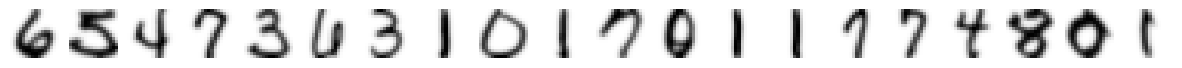

In [2]:
import matplotlib.pyplot as plt

def plot_digits(X):
    """Small helper function to plot 100 digits."""
    fig, axs = plt.subplots(nrows=1, ncols=20, figsize=(15, 15))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")
        
plot_digits(X)

<BarContainer object of 256 artists>

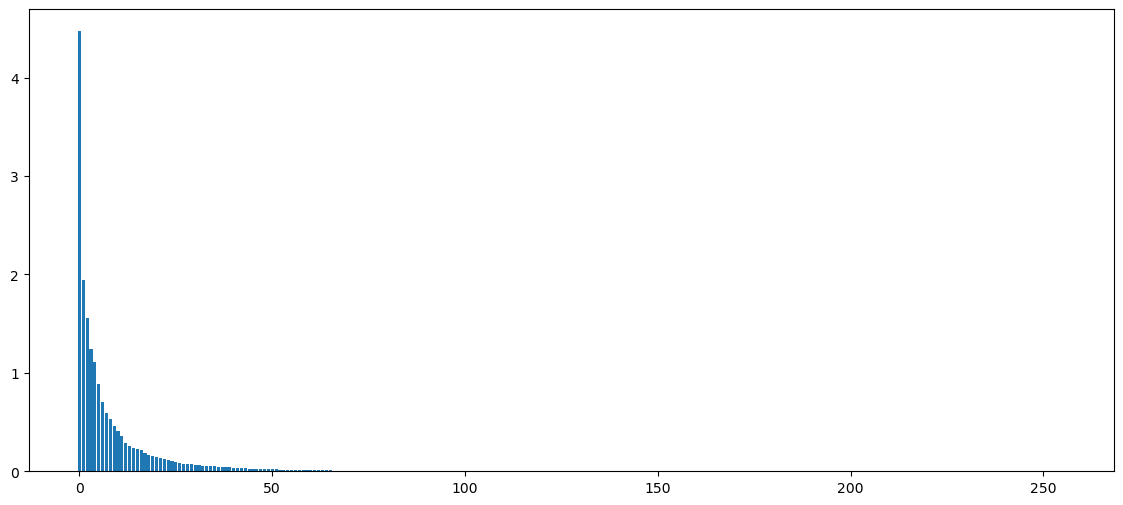

In [3]:
cov=np.cov(X.T)
mean=np.mean(X,axis=0)

from numpy import linalg as LA

# gdyby nie było posortowane
# def eigen(A):
#     eigenValues, eigenVectors = LA.eig(A)
#     idx = np.argsort(eigenValues)
#     eigenValues = eigenValues[idx]
#     eigenVectors = eigenVectors[:,idx]
#     return (eigenValues, eigenVectors)

la, ev = LA.eig(cov)

fig = plt.figure(figsize = (14, 6))
plt.bar(range(len(la)),la)
#plt.show()

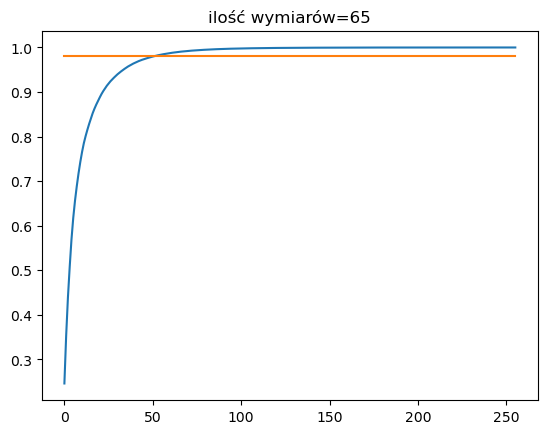

In [4]:
sla=np.zeros(len(la))
sla[0]=la[0]
for i in range(1,len(la)):
    sla[i]=sla[i-1]+la[i]
sla=sla

n=len(sla[sla<=0.99*sla[-1]])

#plt.plot(la)
plt.plot(sla/sla[-1])
tytul="ilość wymiarów="+str(n)
plt.title(tytul)
plt.plot(0.98*np.ones(len(la)))

In [5]:
def Enkoder(x,mean,ev,n):
    w=np.zeros(n)
    for i in range(n):
        w[i]=np.dot(ev[:,i],x-mean)
    return(w)

def Dekoder(w,mean,ev):
    dx=mean.copy()
    for i in range(len(w)):
        dx+=w[i]*ev[:,i]
    return(dx)

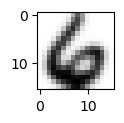

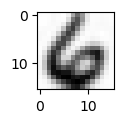

In [7]:

n=65

Y=Dekoder(Enkoder(X[0],mean,ev,n),mean,ev)
plt.figure(figsize=(1,1))
plt.imshow(X[0].reshape((16, 16)), cmap="Greys")
plt.show()
plt.figure(figsize=(1,1))
plt.imshow(Y.reshape((16, 16)), cmap="Greys")
plt.show()

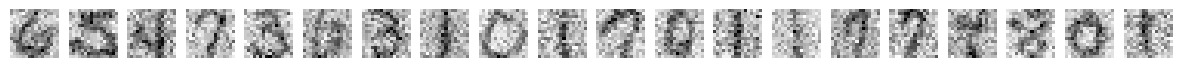

In [8]:
rng = np.random.RandomState(0)

sigma=0.3
noise = rng.normal(scale=sigma, size=X.shape)
X_noisy = X + noise
plot_digits(X_noisy)

In [9]:
cov_noisy=np.cov(X_noisy.T)
mean_noisy=np.mean(X,axis=0)

from numpy import linalg as LA
la_noisy, ev_noisy = LA.eig(cov_noisy)

In [11]:
# wypisanie błędu przy denosing
blad=sigma**2*np.array(range(len(sla)))+sla[-1]-sla

25

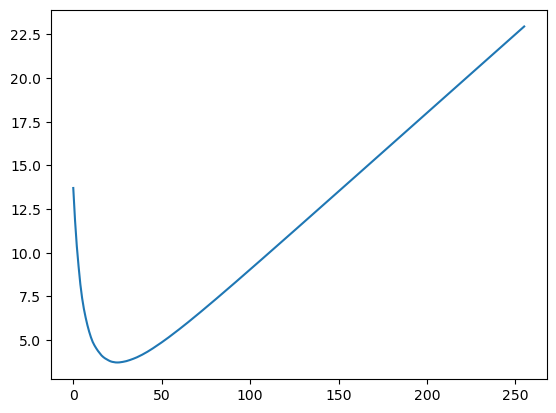

In [46]:
plt.plot(blad)
np.argmin(blad)

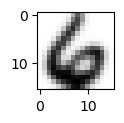

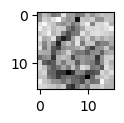

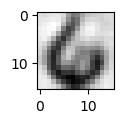

In [12]:
il=25
Z=Dekoder(Enkoder(X_noisy[0],mean_noisy,ev_noisy,il),mean_noisy,ev_noisy)
plt.figure(figsize=(1,1))
plt.imshow(X[0].reshape((16, 16)), cmap="Greys")
plt.show()
plt.figure(figsize=(1,1))
plt.imshow(X_noisy[0].reshape((16, 16)), cmap="Greys")
plt.show()
plt.figure(figsize=(1,1))
plt.imshow(Z.reshape((16, 16)), cmap="Greys")
plt.show()
